In [ ]:
#prepare newspaper data and merge

In [1]:
#from prep_data import *
df = read_and_clean()
print("Done...")

NameError: name 'read_and_clean' is not defined

# load data

In [9]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
import pandas as pd
import os, re, logging
from collections import defaultdict
import matplotlib.pyplot as plt

### set basepaths

In [38]:
#PATH_TO_DATA = '/home/anne/tmpanne/RPA_data/'

PATH_TO_DATA = '/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'
BASE = '/Users/anne/repos/RPA/resources/'
FILENAME = '20140718_dutchdictionary.txt'

#PATH_TO_DATA = '/Users/anne/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'

In [4]:
pd.__version__

'0.25.0'

In [5]:
# load data from current project: 
df1 = pd.read_pickle(PATH_TO_DATA + 'VK_TEL')
df1 = df1[['text_title', 'main_topic', 'main_topic_label']]
df1.rename(columns={'text_title' : 'text', 'main_topic' : 'topic'}, inplace = True)

In [6]:
# load data from Bjorn 
d2 = pd.read_pickle(PATH_TO_DATA + 'dataset_burscher.pkl')

In [7]:
d2['n'] =1
d2.groupby(d2.main_topic_label).agg({'n' :'sum'})

,n
main_topic_label,
Arbeid,217
Buitenlandse zaken en ontwikkelingssamenwerking,1109
Burgerrechten en vrijheden,327
Defensie,394
Energiebeleid,81
Functioneren democratie en openbaar bestuur,1303
"Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning",114
Gezondheid,445
Immigratie en integratie,151


In [10]:
# recode so to match Bjorn's datset

a = ['Buitenlandse handel' , 'Kunst, cultuur en entertainment' , 'Ruimtelijke ordening, publiek natuur- en waterbeheer', 'Toegevoegde codes voor media'] 
b = ['Overige' ] * len(a)
overige_cat = dict(zip(a,b))
print(overige_cat)

df1['main_topic_label'].replace(overige_cat, inplace = True)
len(df1['main_topic_label'].unique())

{'Buitenlandse handel': 'Overige', 'Kunst, cultuur en entertainment': 'Overige', 'Ruimtelijke ordening, publiek natuur- en waterbeheer': 'Overige', 'Toegevoegde codes voor media': 'Overige'}


19

In [11]:
df1['n'] =1
df1.groupby(df1.main_topic_label).agg({'n' :'sum'})

,n
main_topic_label,
Arbeid,20
Buitenlandse zaken en ontwikkelingssamenwerking,48
Burgerrechten en vrijheden,29
Defensie,24
Energiebeleid,15
Functioneren democratie en openbaar bestuur,203
"Gemeenschapsontwikkeling, huisvestingsbeleid en stedelijke planning",23
Gezondheid,22
Immigratie en integratie,30


#### merge manual coding with dataset of Bjorn

In [59]:
df = df1.append(d2)
df = df.sample(300)
df.reset_index(drop=True, inplace=True)
df['documentnr'] = df.index

In [99]:
df = pd.read_pickle(PATH_TO_DATA + 'all_data.pkl')

#### code text according to dictionary of belgian study

In [62]:
df = get_merged_df(df)

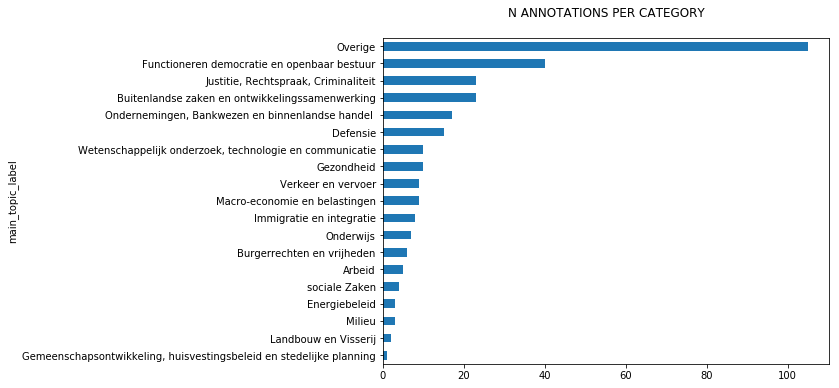

In [67]:
# verdeling annotaties per categorie. 
fig = plt.figure(figsize=(8,6))

df.groupby('main_topic_label').text_x.count().sort_values().plot.barh(ylim=0, title= 'N ANNOTATIONS PER CATEGORY\n')
plt.show()

In [84]:
df['id'] = df.index

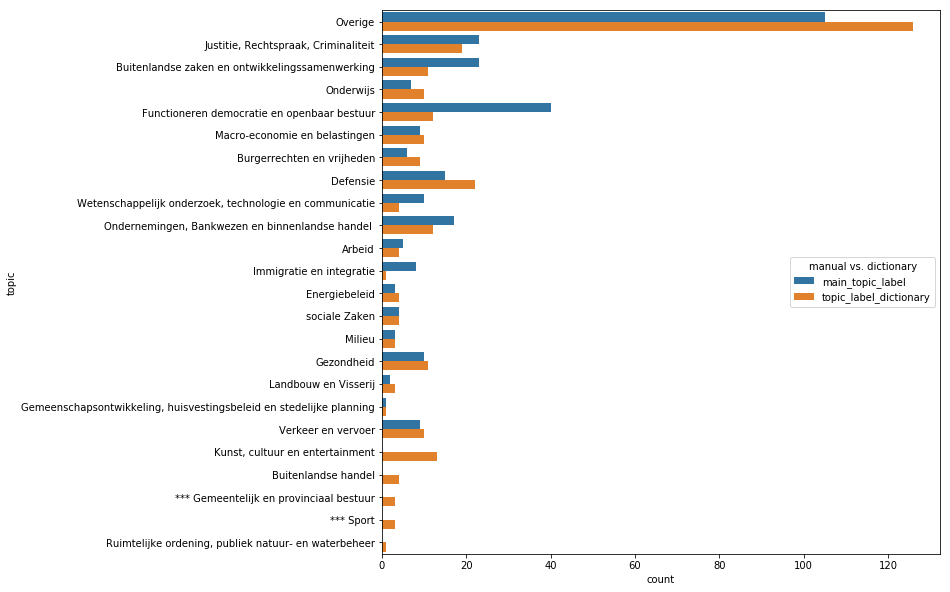

In [97]:
import seaborn as sns

plt.rcParams['figure.figsize']=(10,10)
ax = sns.countplot(y="topic", hue='manual vs. dictionary', data=melted)

In [101]:
df['main_topic_id']  = df['main_topic_label'].factorize()[0]

data = list(df.text_x)
labels = df.main_topic_id

print("The variable document has the type: {} and the length: {} \n \
The variable labels has the type: {} and the length: {}".format(type(data), len(data), type(labels), len(labels)))

The variable document has the type: <class 'list'> and the length: 300 
 The variable labels has the type: <class 'pandas.core.series.Series'> and the length: 300


In [6]:
import pandas as pd
PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'

def get_data():
    df = pd.read_pickle(PATH_TO_DATA + 'all_data.pkl')
    df['main_topic_id']  = df['main_topic_label'].factorize()[0]
    data = df.text_x.to_list()
    labels = df.main_topic_id
    return data, labels

In [7]:
data, labels = get_data()

In [58]:
import pandas as pd

PATH_TO_DATA = '~/surfdrive/uva/projects/RPA_KeepingScore/pickle_files/'
df = pd.read_pickle(PATH_TO_DATA + 'all_data.pkl')

df['main_topic_id']  = df['main_topic_label'].factorize()[0]

In [59]:
data = df.text_x.to_list()
labels = df.main_topic_id

In [60]:
X_train , X_test , y_train , y_test = train_test_split (data, labels, test_size = 0.2 , random_state =42)

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,  TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

names = [
         "Naive Bayes",
         "Passive Agressive",
         "SGDClassifier"
        ]

classifiers = [
    MultinomialNB(),
    PassiveAggressiveClassifier(),
    SGDClassifier(),
]

parameters = [
             {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3, 1e-5)},
    
            {
            
            'clf__loss': ('hinge', 'squared_hinge'),
            'clf__C': (0.01, 0.5, 1.0)   ,
            'clf__fit_intercept': (True, False) , 
            'vect__ngram_range': [(1, 1), (1, 2)] ,
            'tfidf__use_idf' :(True ,False),
            'clf__max_iter': (5 ,10 ,15)

            } ,
    
              {'clf__max_iter': (20, 30) , 
               'clf__alpha': (1e-2, 1e-3, 1e-5), 
               'clf__penalty': ('l2', 'elasticnet')} 
             ]

for name, classifier, params in zip(names, classifiers, parameters):
    print(name)
    print(classifier)
    print(params)
    clf_pipe = Pipeline([
        ('vect', TfidfVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', classifier),
    ])
    
    gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1, cv=3)
    clf = gs_clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{} score: {}".format(name, score))
    print("{} are the best estimators".format(clf.best_estimator_))
    print(classification_report(clf.best_estimator_.predict(X_test), y_test))
    results_to_dict = metrics.classification_report((clf.best_estimator_.predict(X_test), y_test), output_dict=True ) 
    #print(classification_report(, y_pred, target_names=target_names))

Naive Bayes
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
{'vect__ngram_range': [(1, 1), (1, 2)], 'clf__alpha': (0.01, 0.001, 1e-05)}
Naive Bayes score: 0.6352117372457485
Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
...ear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True))]) are the best estimators
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        54
           1       0.19      0.47      0.27        40
           2       0.60      0.59      0.60       286
           3       0.38      0.66      0.49        50
           4       0.65      0.63      0.64       135
           5       0.35      0.88 

TypeError: classification_report() missing 1 required positional argument: 'y_pred'

In [66]:
rf = PassiveAggressiveClassifier(random_state = 42, loss = 'hinge')
rf.get_params()

{'C': 1.0,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'fit_intercept': True,
 'loss': 'hinge',
 'max_iter': None,
 'n_iter': None,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'random_state': 42,
 'shuffle': True,
 'tol': None,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [82]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

names = [
         "Naive Bayes",
         "Linear SVM",
         "Logistic Regression",
         "Random Forest",
         "Multilayer Perceptron"
        ]

classifiers = [
    MultinomialNB(),
    LinearSVC(),
    LogisticRegression(),
    RandomForestClassifier(),
    MLPClassifier()
]

parameters = [
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(-5, 1, 5))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__C': (np.logspace(-5, 1, 5))},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__max_depth': (1, 2)},
              {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__alpha': (1e-2, 1e-3)}
             ]

for name, classifier, params in zip(names, classifiers, parameters):
    clf_pipe = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', classifier),
    ])
    gs_clf = GridSearchCV(clf_pipe, param_grid=params, n_jobs=-1)
    clf = gs_clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("{} score: {}".format(name, score))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Naive Bayes score: 0.4485294117647059


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Linear SVM score: 0.5220588235294118


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/V

Logistic Regression score: 0.4411764705882353


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/V

Random Forest score: 0.3014705882352941


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Multilayer Perceptron score: 0.4338235294117647


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [83]:
print("Best parameters:", clf.best_params_)

Best parameters: {'clf__alpha': 0.01, 'vect__ngram_range': (1, 1)}


In [80]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clf', SGDClassifier()),
])
parameters = [
    {
        'vect__max_df': (0.5, 0.75, 1.0),
        'clf': (SGDClassifier(),),
        'clf__alpha': (0.00001, 0.000001),
        'clf__penalty': ('l2', 'elasticnet'),
        'clf__max_iter': (10, 50, 80),
    }, {
        'vect__max_df': (0.5, 0.75, 1.0),
        'clf': (MultinomialNB(),),
        'clf__C': (0.01, 0.5, 1.0)
    }
]

#grid_search = GridSearchCV(pipeline, parameters)

search = GridSearchCV(pipeline, parameters, iid=False, cv=5)
search.fit(X_train, y_train )   

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print()
print("Best parameters:", search.best_params_)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be r

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be r

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be r

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be r

KeyboardInterrupt: 

In [75]:
pipe = Pipeline(steps=[('estimator', SVC())])

# Add a dict of estimator and estimator related parameters in this list
params_grid = [{
                'estimator':[SVC()],
                'estimator__C': [1, 10, 100, 1000],
                'estimator__gamma': [0.001, 0.0001],
                },
                {
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_depth': [1,2,3,4,5],
                'estimator__max_features': [None, "auto", "sqrt", "log2"],
                },
               # {'estimator':[Any_other_estimator_you_want],
               #  'estimator__valid_param_of_your_estimator':[valid_values]

              ]

search = GridSearchCV(pipe, params_grid)


#search = GridSearchCV(pipeline, param_grid, iid=False, cv=5)

search.fit(X_train, y_train )   

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print()
print("Best parameters:", search.best_params_)

return search.best_params_

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: could not convert string to float: " Iedereen deelnemen aan de Lotto Dwars Sportgelden Dit jaar hoeven de Nederlandse sportbonden zich geen zorgen te maken over de financi\\xeble middelen die zij, via moederorganisatie NOC*NSF, van sportloterij De Lotto zullen ontvangen. Er is in het vorig jaar geaccordeerde vierjarenplan 52 miljoen euro beloofd. En er zal dit jaar 52.175.000 euro worden verdeeld onder de 76 bonden die Nederland telt. Het is grofweg een subsidie van 11 euro per geregistreerde sporter in Nederland. Dat zijn er 4,8 miljoen. De Lotto is goed voor de sport. Sinds 1961, het prille begin met de voetbaltoto, werd 1,3 miljard euro aan de sport uitgekeerd. Volgend jaar komt de eerste korting van lottogelden. Er is een crisis gaande en die zal ook de sport voelen. NOC*NSF-voorzitter Andr\\xe9 Bolhuis had het dinsdag bij de jaarvergadering van de sportkoepel over de wind die, na een periode in de luwte, nu wel te voelen zou zijn. 'Steeds duidelijker wordt zichtbaar waar de recessie zijn effecten heeft. Ook de sport ontkomt er niet aan.' De korting in 2014 zal 3 miljoen euro bedragen. Er gaat dan 49.146.250 euro naar de sport vanuit deze pijplijn. Hoe het in 2015 en 2016 verder moet, mocht De Lotto matig blijven presteren, is onduidelijk. Voorzitter Bolhuis, ondernemer van huis uit, is geneigd de reserves van NOC*NSF aan te spreken, het 'schommelfonds voor lastige tijden'. Daarin zit 57 miljoen spaargeld. Bolhuis vindt dat dit geld juist nu moet worden gebruikt. Het vullen van de spaarpot is voor later. De dempende werking van het fonds zal iedereen bevallen, denkt hij. Zwemvoorzitter Erik van Heijningen, ook een VVD'er, spoorde bij de jaarvergadering De Lotto aan tot betere prestaties. Er is momenteel een groot verval van de inleg van de deelnemers zichtbaar. Van ruim 50 miljoen euro in de topjaren zakt de inleg nu tot iets meer dan 40 miljoen per jaar. Hockeydirecteur Johan Wakkie vroeg de vergadering wie er actief in de lotto meespeelde. In de zaal met 200 toehoorders gingen er 25 handen omhoog. Namens de onderwatersportbond kwam voorzitter Jack de Vries (CDA) vertellen dat er meer focus moet komen op de vergroting van inkomsten uit de kansspelen. Dat is toegezegd door het kabinet Rutte II. Bolhuis zei op politiek gebied zeer actief te zijn. Staatssecretaris Teeven is een vaste gesprekspartner. Hij moet de belofte uit het regeerakkoord van inhoud voorzien. De Lotto is \\xe9\\xe9n probleem, de wegvallende lokale sponsoring is een tweede dilemma voor de sport. Het gevaar ligt verscholen in de financi\\xeble huishouding van de gemeenten. Als die pakweg 5 procent bezuinigen op de sportuitgaven, betekent dat een korting van 50 miljoen euro. De Nederlandse gemeenten zijn de grootste subsidiegevers van de sport: 1 miljard op jaarbasis. Bij de gemeenteraadsverkiezingen van volgend jaar moeten de subsidies voor sport tot inzet worden gemaakt. De sport moet samen optrekken tegen bezuinigingen, was het betoog van Bolhuis. Hij was volkomen op stoom, toen hij aan Jack de Vries, ex-staatssecretaris van Defensie, vroeg zich in te zetten voor dat goede doel. Bolhuis tegen De Vries: 'Sluit u aan bij het leger van de sport.' Er werd nog net niet gesalueerd op Papendal. NOC*NSF vreest mes in gemeentelijke sportuitgaven"

In [9]:
import xlrd

df_np1 = pd.read_excel('/Users/admin/RPA_github/data/TG_Margien.xlsx')
df_np1['document nummer']
df_np2 = pd.read_excel('/Users/admin/RPA_github/data/TG_Heleen.xlsx')
df_np2['document nummer']
df_np3 = pd.read_excel('/Users/admin/RPA_github/data/VK_Heleen.xlsx')
df_np3['document nummer'] = df_np3['Document nummer']
df_np4 = pd.read_excel('/Users/admin/RPA_github/data/VK_Margien.xlsx')
df_np4['document nummer'] = df_np4['Document nummer']
df_np5 = pd.read_excel('/Users/admin/RPA_github/data/VK_Petra2.xlsx')
df_np5['document nummer'] = df_np5['Document nummer']
df_np6 = pd.read_excel('/Users/admin/RPA_github/data/TG_Petra2.xlsx')

df_new = pd.concat([df_np1, df_np2, df_np3, df_np4, df_np5 , df_np6])
df_new

df_np = df_new
len(df_np)

ImportError: Install xlrd >= 1.0.0 for Excel support